
--- Linear Kernel ---
Accuracy: 0.956140350877193
Confusion Matrix:
 [[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


--- RBF Kernel ---
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters for RBF: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Cross-validation Accuracy: 0.978931842881

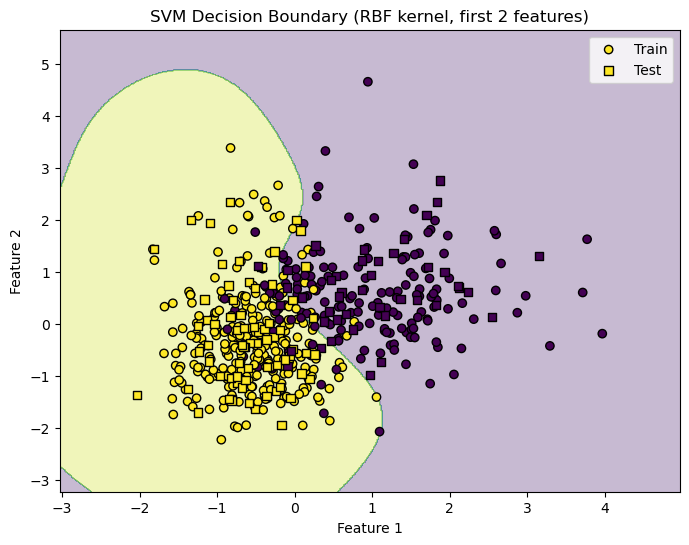

In [1]:
# Task 7 - Support Vector Machines (SVM)
# AI & ML Internship - Example Solution

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load and Prepare Dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 2. Train SVM Models
# Linear kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

# RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# 3. Evaluate Performance
print("\n--- Linear Kernel ---")
y_pred_lin = svm_linear.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lin))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin))

print("\n--- RBF Kernel ---")
y_pred_rbf = svm_rbf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# 4. Hyperparameter Tuning with Grid Search (example for RBF)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
print("\nBest Parameters for RBF:", grid.best_params_)

# 5. Cross-validation score
cv_scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("Cross-validation Accuracy:", np.mean(cv_scores))

# 6. Visualizing Decision Boundaries (using only 2 features for plotting)
# Select two features for visualization
X_vis = X_scaled[:, :2]  # first two features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

# Train an SVM with RBF kernel for 2D plotting
svm_vis = SVC(kernel='rbf', C=1, gamma=0.5)
svm_vis.fit(X_train_vis, y_train_vis)

# Create mesh grid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on grid points
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolors='k', marker='o', label="Train")
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolors='k', marker='s', label="Test")
plt.title("SVM Decision Boundary (RBF kernel, first 2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
